**Outline**
1. Use generated data and classes from before
2. Code the back propagation algorithm for our first FF network - single weight and all weights
3. Visualize working of our first FF network
4. Code the back propagation algorithm for a larger FF network
5. Understand the iterative kernel within the back propagation algorithm
6. Exercises

## Setup

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
! pip install seaborn
! pip install imageio
import seaborn as sns
import imageio
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [10]:
np.random.seed(0)

## Generate data

In [11]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


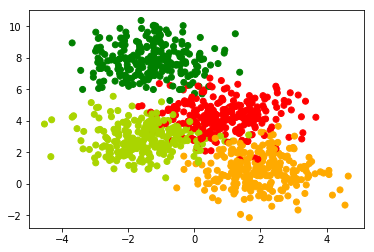

In [12]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [13]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

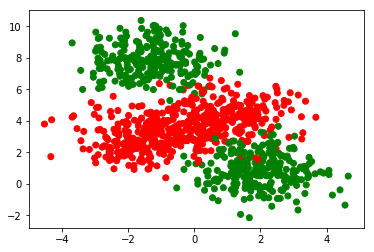

In [14]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


## Our First FF Network

In [16]:
class FFNetworkW1:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)  
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
      w1 = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1

      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      
      if display_loss:
        w1[i] = self.w1
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
    
    if display_loss:
      plt.tight_layout()
      
      plt.subplot(2,1,1)
      plt.plot(w1.values())
      plt.xlabel('Epochs')
      plt.ylabel('W1')
      
      plt.subplot(2,1,2)
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

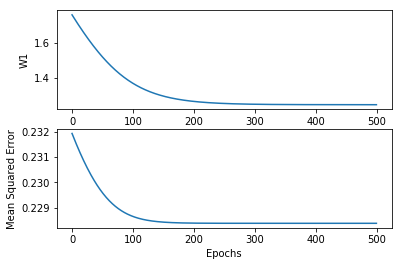

In [17]:
ffnw1 = FFNetworkW1()
ffnw1.fit(X_train, Y_train, epochs=500, learning_rate=1, display_loss=True)

In [51]:
class FirstFFNetwork:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w6*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w7*self.h1 + self.w8*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    self.a4 = self.w9*self.h1 + self.w10*self.h2 + self.b4
    self.h4 = self.sigmoid(self.a4)
    self.a5 = self.w11*self.h3 + self.w12*self.h4 + self.b5
    self.h5 = self.sigmoid(self.a5)
   
    return self.h5
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw11 = (self.h5-y) * self.h5*(1-self.h5) * self.h3
    self.dw12 = (self.h5-y) * self.h5*(1-self.h5) * self.h4
    self.db5 = (self.h5-y) * self.h5*(1-self.h5)
    
    self.dw7 = (self.h5-y) * self.h5*(1-self.h5) * self.w11 * self.h3*(1-self.h3) * self.h1
    self.dw8 = (self.h5-y) * self.h5*(1-self.h5) * self.w11 * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h5-y) * self.h5*(1-self.h5) * self.w11 * self.h3*(1-self.h3)
    
    self.dw9 = (self.h5-y) * self.h5*(1-self.h5) * self.w12 * self.h4*(1-self.h4) * self.h1
    self.dw10 = (self.h5-y) * self.h5*(1-self.h5) * self.w12 * self.h4*(1-self.h4) * self.h2
    self.db4 = (self.h5-y) * self.h5*(1-self.h5) * self.w12 * self.h4*(1-self.h4)  

    self.dw1 = (self.h5-y) * self.h5*(1-self.h5) *( self.w11*self.h3*(1-self.h3) * self.h1 + self.w12 * self.h4*(1-self.h4) * self.h1) * self.h1*(1-self.h1) *self.x1
    self.dw2 = (self.h5-y) * self.h5*(1-self.h5) *( self.w11*self.h3*(1-self.h3) * self.h1 + self.w12 * self.h4*(1-self.h4) * self.h1) * self.h1*(1-self.h1) *self.x2
    self.db1 =  (self.h5-y) * self.h5*(1-self.h5) *( self.w11*self.h3*(1-self.h3) * self.h1 + self.w12 * self.h4*(1-self.h4) * self.h1) * self.h1*(1-self.h1) 
    
    self.dw3 = (self.h5-y) * self.h5*(1-self.h5) *( self.w11*self.h3*(1-self.h3) * self.h2 + self.w12 * self.h4*(1-self.h4) * self.h2) * self.h2*(1-self.h2) *self.x1
    self.dw6 = (self.h5-y) * self.h5*(1-self.h5) *( self.w11*self.h3*(1-self.h3) * self.h2 + self.w12 * self.h4*(1-self.h4) * self.h2) * self.h2*(1-self.h2) *self.x2
    self.db2 =  (self.h5-y) * self.h5*(1-self.h5) *( self.w11*self.h3*(1-self.h3) * self.h2 + self.w12 * self.h4*(1-self.h4) * self.h2) * self.h2*(1-self.h2) 
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, display_weight=False):
    
    # initialise w, b
    if initialise:
      np.random.seed(0)
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()

      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w10 = np.random.randn()
      self.w11 = np.random.randn()
      self.w12 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3,dw7,dw8,dw9,dw10,dw11,dw12, dw6, db1, db2, db3,db4,db5 = [0]*15
      dw5=[0]
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
       
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
       
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
   
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
      if display_weight:
      #  weight_matrix = np.array([[0, self.b3, self.w5, self.w6, 0, 0], [self.b1, self.w1, self.w2, self.b2, self.w3, self.w4]])
        weight_matrices.append(weight_matrix)
      
          
  
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)
  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h4)
    return np.array(Y_pred)
  
  def predict_h5(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h5)
    return np.array(Y_pred)

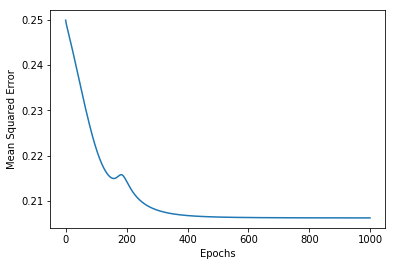

In [59]:
weight_matrices = []
Y1_pred=[]
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=1000, learning_rate=5, display_loss=True, display_weight=False)

In [53]:
Y1_pred

[]

True

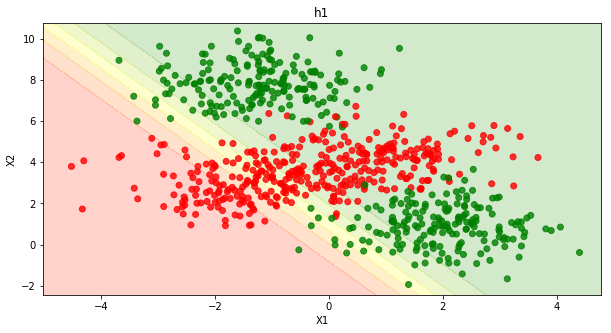

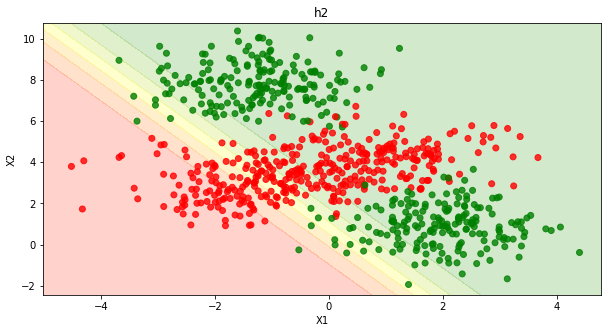

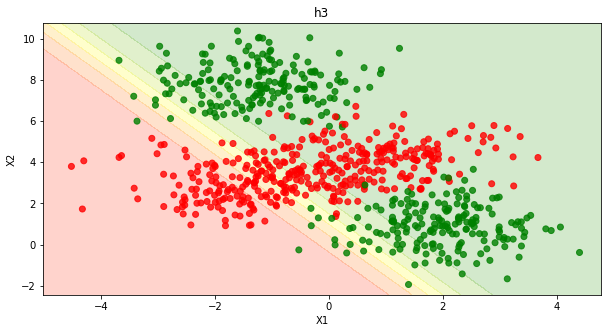

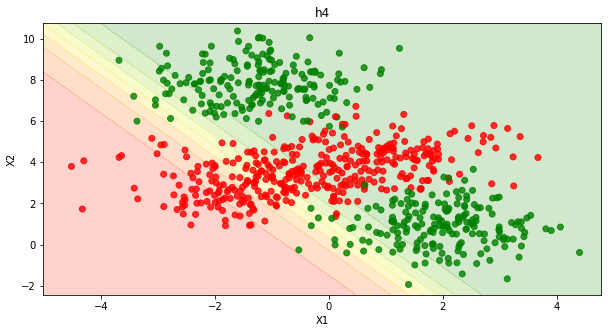

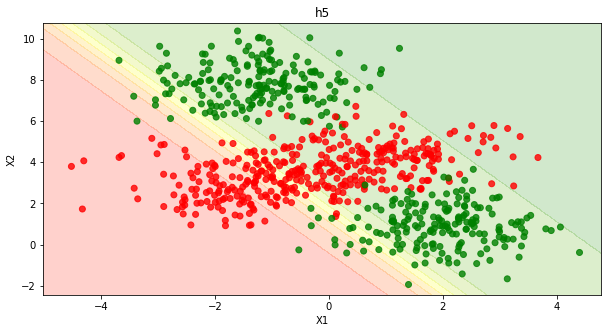

In [54]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  
def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
def plot_boundary():
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    predict_functions = [ffn.predict_h1, ffn.predict_h2, ffn.predict_h3,ffn.predict_h4,ffn.predict_h5]
    
    for i in range(5):

      fig, ax = plt.subplots(figsize=(10,5))

      plot_contours(ax, predict_functions[i], xx, yy,
                    cmap=my_cmap, alpha=0.2)
      ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, alpha=0.8)
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_title("h"+str(i+1))
      
    return True
  
plot_boundary()

In [55]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(weight_matrices[epoch], annot=True, cmap=my_cmap, vmin=-3, vmax=3)
    plt.title("Epoch "+str(epoch))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

In [56]:
#imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//50)], fps=1)

In [57]:
from IPython import display
#HTML('<img src="weights_viz.gif">')

In [58]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.67
Validation accuracy 0.66


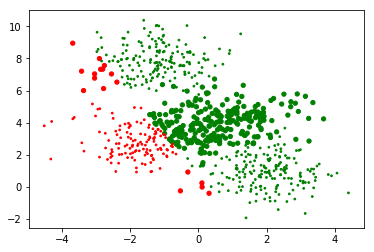

In [46]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

## Multi class classification

In [24]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [25]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this 

(750, 4) (250, 4)


In [49]:
class FFSN_MultiClass_Specific:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.dw5 = (self.h3-self.y1) * self.h1 
    self.dw6 = (self.h3-self.y1) * self.h2
    self.db3 = (self.h3-self.y1)
                    
    self.dw7 = (self.h4-self.y2) * self.h1
    self.dw8 = (self.h4-self.y2) * self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3) * self.h1
    self.dw10 = (self.h5-self.y3) * self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4) * self.h1
    self.dw12 = (self.h6-self.y4) * self.h2
    self.db6 = (self.h6-self.y4)
                    
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
    self.dw2 = self.dh1 * self.h1*(1-self.h1) * self.x2
    self.db1 = self.dh1 * self.h1*(1-self.h1)
                    
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2 * self.h2*(1-self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
    self.db2 = self.dh2 * self.h2*(1-self.h2)
    
  def grad_short(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3
    
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db3 = self.da4
    
    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db3 = self.da5
    
    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db3 = self.da6
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
    
    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db1 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred) 
  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  def predict_h6(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h6)
    return np.array(Y_pred)
  def predict_h5(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h5)
    return np.array(Y_pred)
  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h4)
    return np.array(Y_pred)
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)


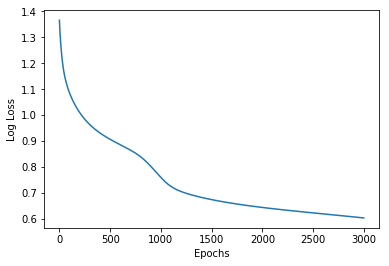

In [68]:
weight_matrices = []
ffsn_multi_specific = FFSN_MultiClass_Specific()
ffsn_multi_specific.fit(X_train,y_OH_train,epochs=3000,learning_rate=1,display_loss=True, display_weight=True)

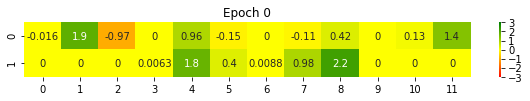

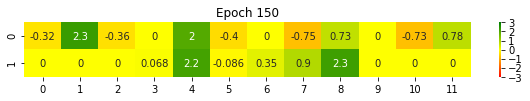

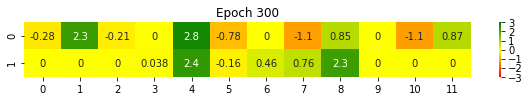

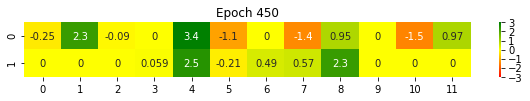

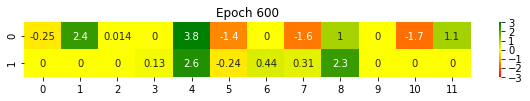

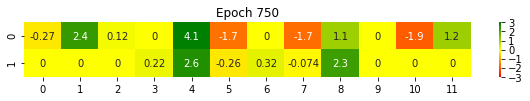

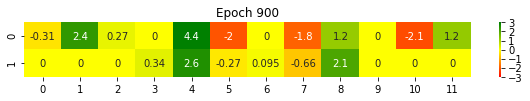

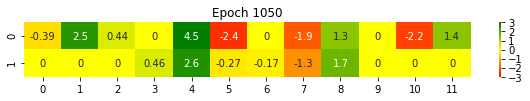

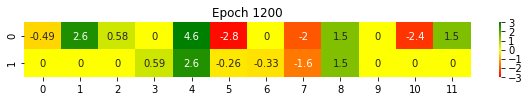

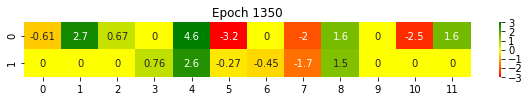

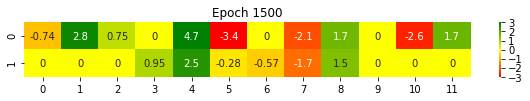

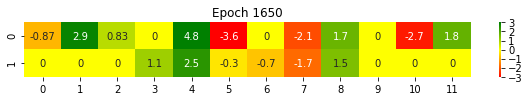

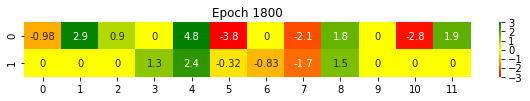

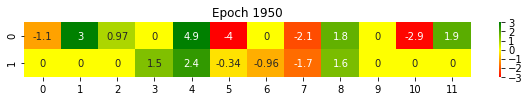

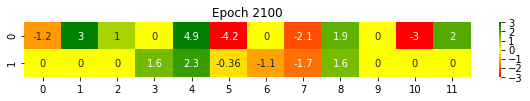

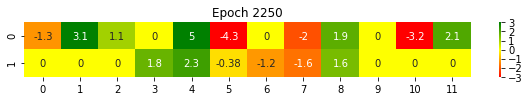

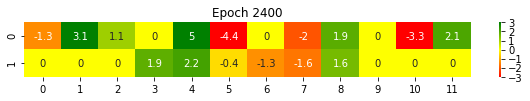

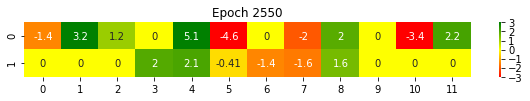

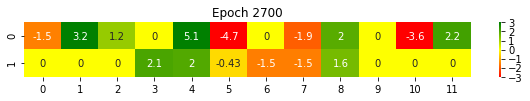

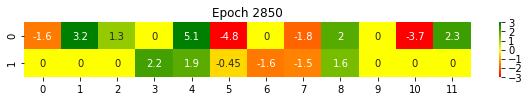

In [69]:
imageio.mimsave('./weights_viz_multi_class.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//20)], fps=1)

In [70]:
HTML('<img src="weights_viz_multi_class.gif">')

In [71]:
Y_pred_train = ffsn_multi_specific.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi_specific.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.77


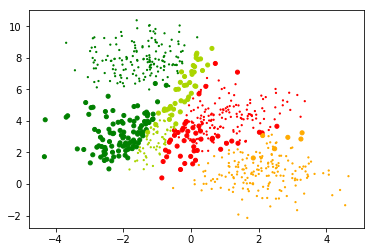

In [72]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

## Exercises

1. Code the backpropagation algorithm with the NN shown to the right
2. Plot the contour maps for multi-class classification and visualize the output of each neuron
3. (Advanced) Visualise the contour maps for first simple network as an animation. For every training of 100 epochs generate one frame with the contour maps of the three neurons.

True

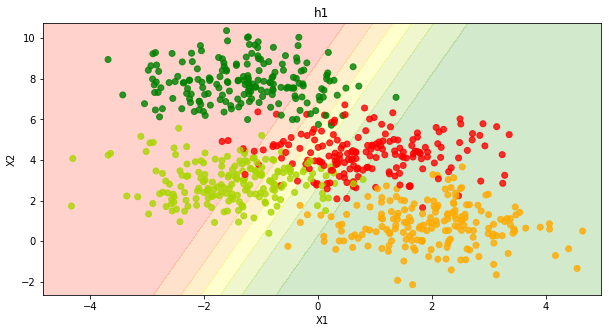

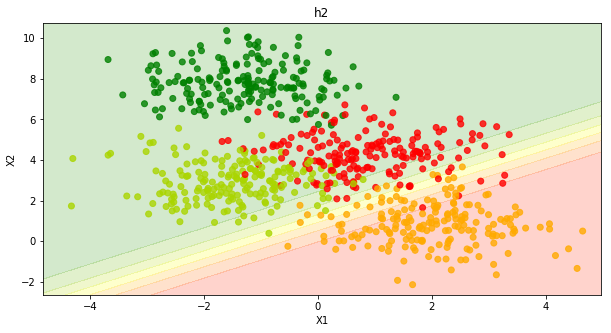

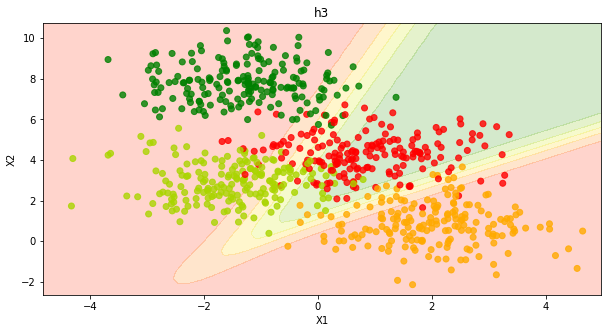

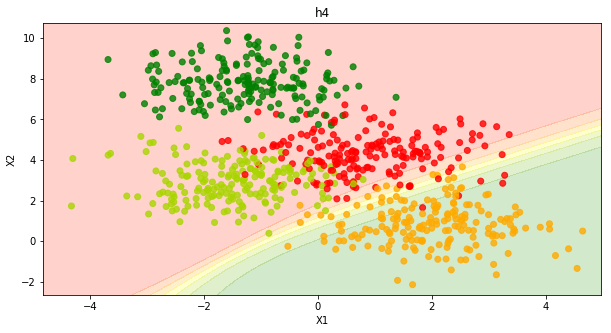

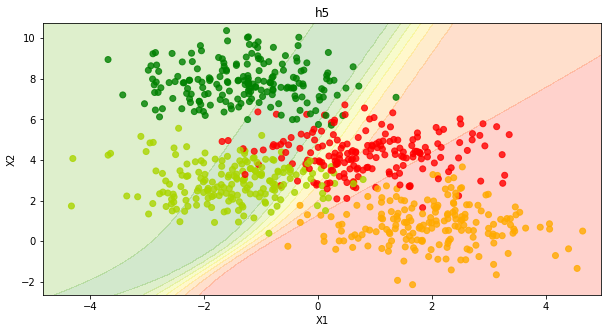

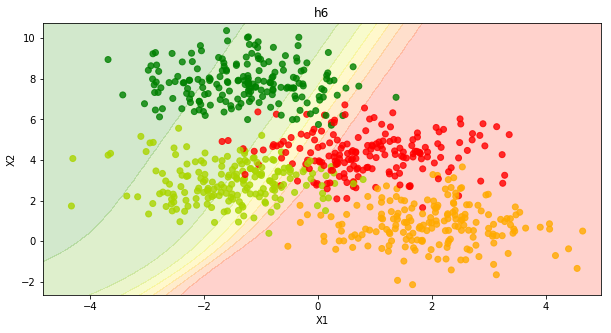

In [73]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  
def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
def plot_boundary():
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    predict_functions = [ffsn_multi_specific.predict_h1, ffsn_multi_specific.predict_h2, ffsn_multi_specific.predict_h3,ffsn_multi_specific.predict_h4,ffsn_multi_specific.predict_h5,ffsn_multi_specific.predict_h6]
    
    for i in range(6):

      fig, ax = plt.subplots(figsize=(10,5))

      plot_contours(ax, predict_functions[i], xx, yy,
                    cmap=my_cmap, alpha=0.2)
      ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, alpha=0.8)
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_title("h"+str(i+1))
      
    return True
  
plot_boundary()

In [ ]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//50)], fps=1)